## Support Vector Machines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
%matplotlib notebook

## Generate Datapoints

In [27]:
# Use Capial X and Small Y (X,y) as per convention
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],    
])
y = np.array([-1,-1, 1, 1, 1])

In [28]:
for i, j in enumerate(X):
    print(i,j)

0 [-2  4 -1]
1 [ 4  1 -1]
2 [ 1  6 -1]
3 [ 2  4 -1]
4 [ 6  2 -1]


## Plot the data points

<IPython.core.display.Javascript object>


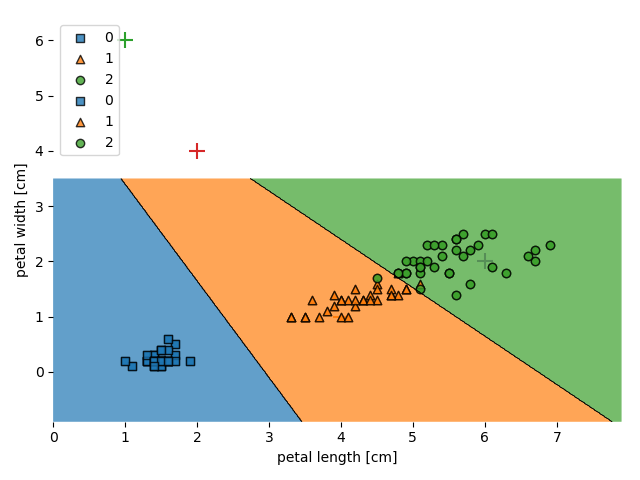

In [29]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d< 2:
        plt.scatter(sample[0], sample[1], s=120, marker="_", linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker="+", linewidths=2)
        
# Print a possible hyperplane, that is separating two classes.
# plt.plot([-2, 6], [6, 0.5])

In [16]:
def svm(X,y):
    weights = np.zeros(X.shape[1])
    alpha = 1 # learning rate
    epochs = 100000 # no of iterations
    for epoch in range(1, epochs):
        for i, x in enumerate(X):
            if (y[i]*np.dot(X[i], weights)) < 1:
                weights = weights + alpha * ((X[i] * y[i]) + (-2 * (1/epoch) *weights))
            else:
                weights = weights + alpha * (-2 * (1/epoch) * weights)
    return weights

In [30]:
weights = svm(X,y)

In [31]:
w = weights

In [32]:
w

array([ 1.58876117,  3.17458055, 11.11863105])

In [26]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d< 2:
        plt.scatter(sample[0], sample[1], s=120, marker="_", linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker="+", linewidths=2)
        
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[0], -w[0]]

x2x3 = np.array([x2, x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale = 1, color = 'red')
        
# Print a possible hyperplane, that is separating two classes.
# plt.plot([-2, 6], [6, 0.5])

IndexError: invalid index to scalar variable.

In [34]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
columns = iris.feature_names
columns.append('target')
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>


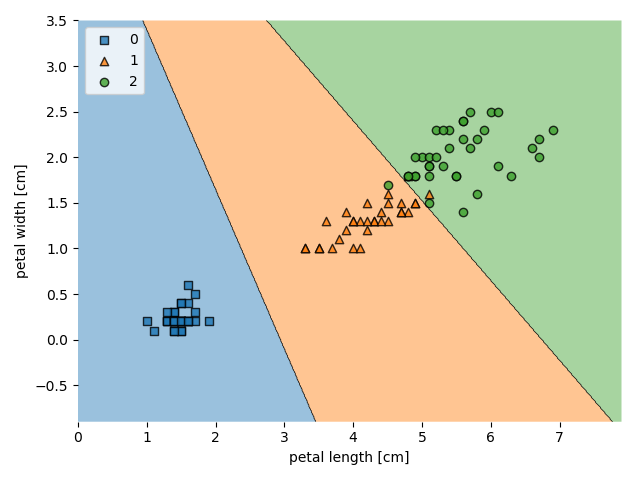

In [40]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, svm)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

<IPython.core.display.Javascript object>


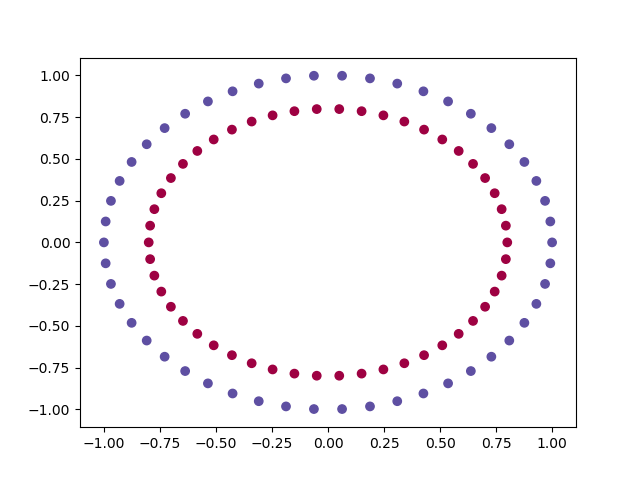

In [43]:
X,y = datasets.make_circles(n_samples=100,
                           shuffle=True,
                           noise=None,
                           random_state=None,
                           factor=0.8)

plt.scatter(X[:,0], X[:,1], c = y, cmap = 'Spectral_r')

<IPython.core.display.Javascript object>


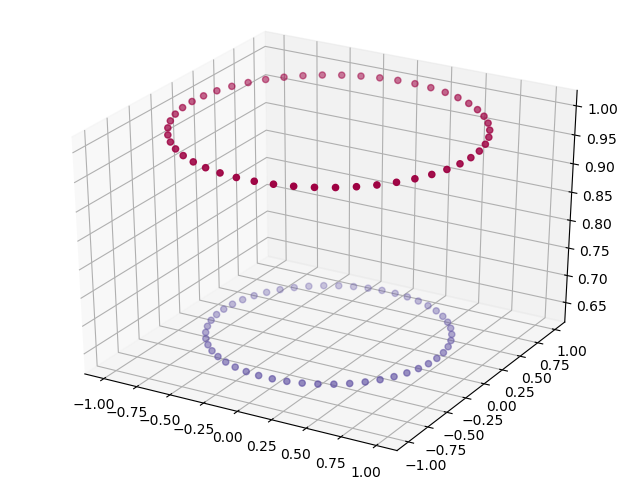

In [44]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

x = X[: , 0]
y = X[: , 1]
z = (np.square(x) + np.square(y))

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z,c = z, cmap='Spectral_r')
pyplot.show()

<IPython.core.display.Javascript object>


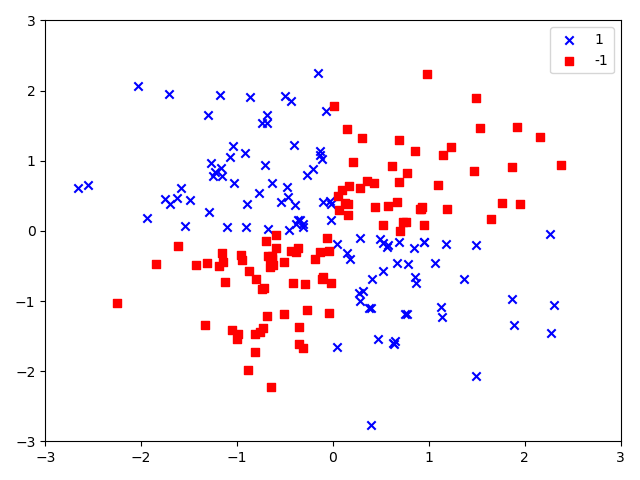

In [45]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


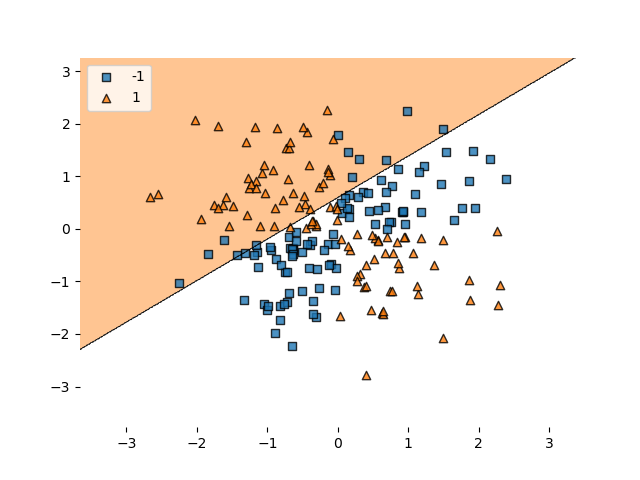

In [46]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

#Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, svm)
plt.legend(loc='upper left')
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


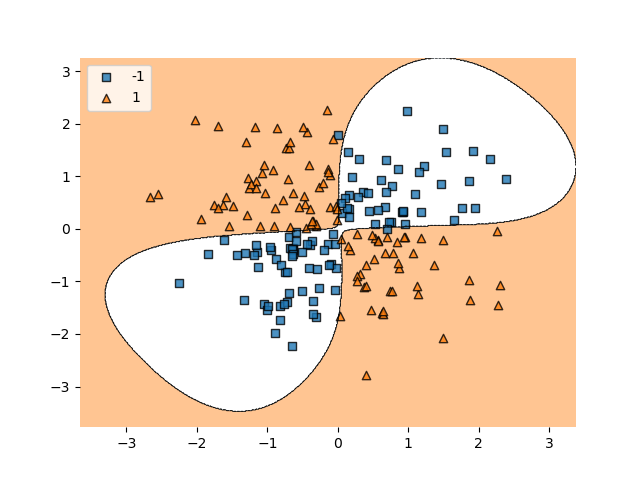

In [49]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='rbf', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

#Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, svm)
plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


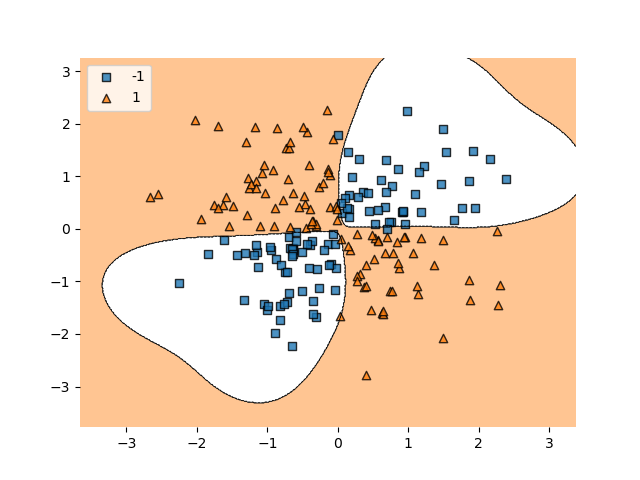

In [51]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='rbf', C=1, random_state=0, gamma=0.9) # C is penalty for misclassification, Gamma is curvature
# Train the classifier
svm.fit(X_xor, y_xor)

#Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, svm)
plt.legend(loc='upper left')
plt.show()